## **Indian Liver Patient Classification with Tree-Based Models**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# import train_test_split from sklearn.model_selection 
from sklearn.model_selection import train_test_split
# import accuracy score 
from sklearn.metrics import accuracy_score 

liver_patient = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
liver_patient.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
# seperate features and target 
y = liver_patient['is_patient'].values 
X = liver_patient[['tot_proteins','albumin','direct_bilirubin','tot_bilirubin']]

SEED = 1 
# instantiate a DecisionTreeClassifier 'dt' with the maximum depth of 6 
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.3, random_state=SEED)

# split the training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED )

# fit the decision tree to the training set 
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.71


In [3]:
# evaluate the 10-fold CCV error 
from sklearn.model_selection import cross_val_score 

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.54


In [4]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE 

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(0.5)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.54


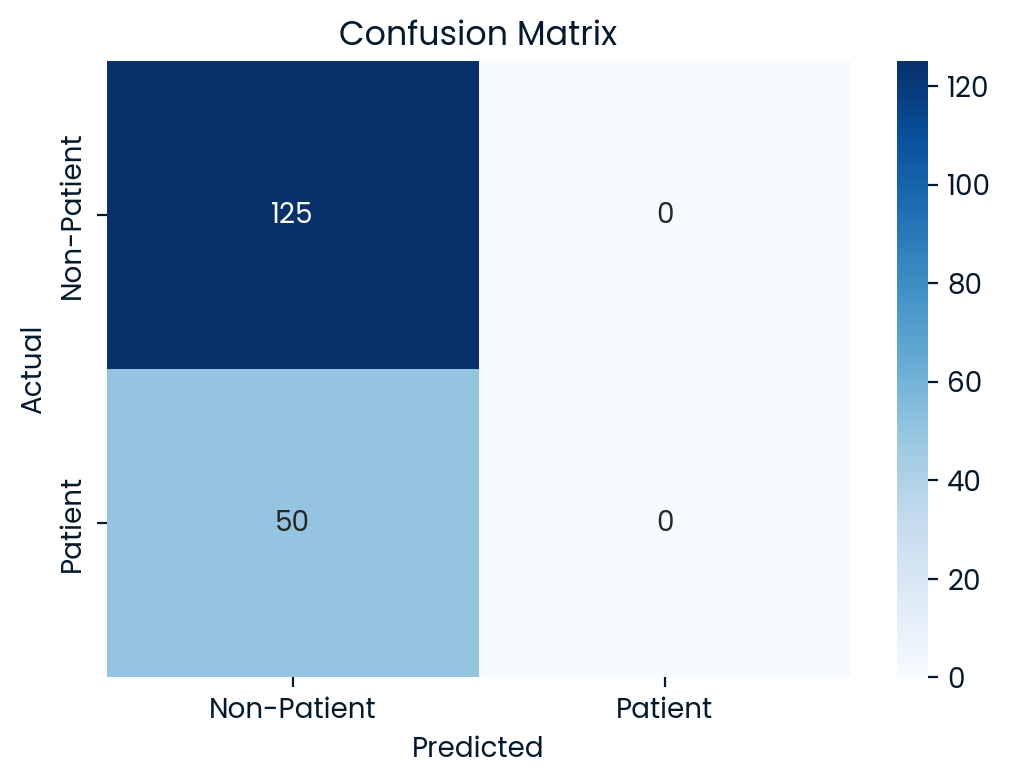

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Patient', 'Patient'], 
            yticklabels=['Non-Patient', 'Patient'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

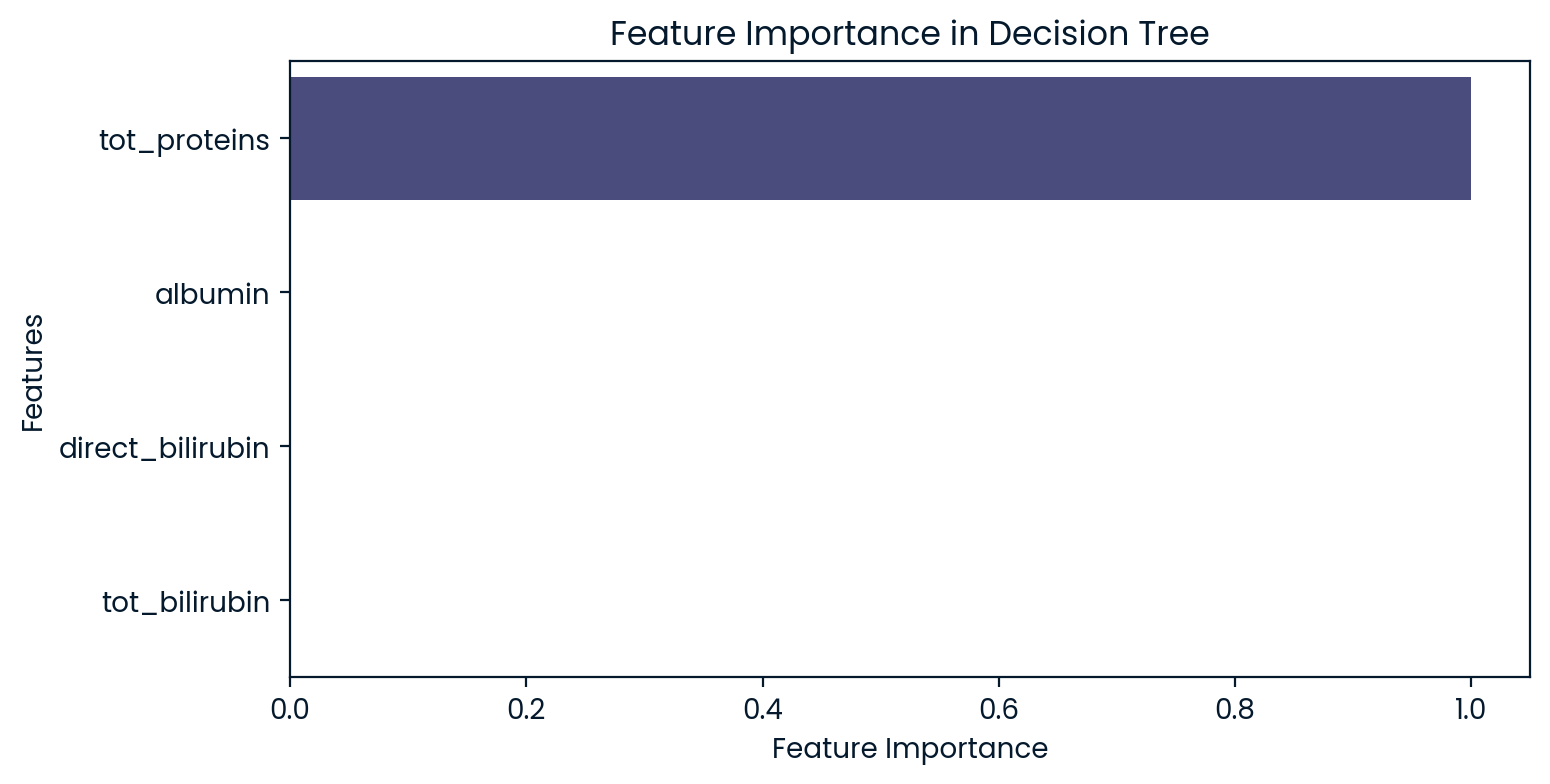

In [6]:
# Get feature importances
importances = dt.feature_importances_
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.show()